<a href="https://colab.research.google.com/github/lu-nasc/EFC1_GCC_253/blob/main/Lucas_Hideki_EFC1_GCC_253.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *Resolução da questão 1.a*

### *Preparação das funções de criação de amostras:*

In [1]:
import numpy as num
import time

gerador_de_numeros = num.random.default_rng(1)

def gerar_lista_de_numeros(quantidade): 
  return gerador_de_numeros.integers(0, 1000, quantidade)

def criar_lista_de_amostras():
  lista = []
  for i in range(5, 1000, 5):
    lista.append(gerar_lista_de_numeros(i))
  return lista


### *Preparação do Pyplot:*

In [40]:
import matplotlib.pyplot as ploter

def plotar_um_caso(tempos):
  intervalo = range(5, 1000, 5)
  ploter.ylabel('tempo gasto (s)')
  ploter.xlabel('quantidade de elementos')
  ploter.plot(intervalo, tempos)
  ploter.show()

def plotar_melhor_pior_caso(melhores_tempos, piores_tempos):
  intervalo = range(5, 1000, 5)
  ploter.ylabel('tempo gasto (s)')
  ploter.xlabel('quantidade de elementos')
  ploter.plot(intervalo, melhores_tempos)
  ploter.plot(intervalo, piores_tempos)
  ploter.show()

def plotar_melhor_aleatorio_pior_caso(melhores_tempos, tempos_aleatorios, piores_tempos):
  intervalo = range(5, 1000, 5)
  ploter.ylabel('tempo gasto (s)')
  ploter.xlabel('quantidade de elementos')
  ploter.plot(intervalo, melhores_tempos)
  ploter.plot(intervalo, tempos_aleatorios)
  ploter.plot(intervalo, piores_tempos)
  ploter.show()



### *Criação de funções para listas de pior e melhor caso:*

In [3]:

def criar_lista_melhor_caso(quantidade):
  return fazer_melhor_caso(gerar_lista_de_numeros(quantidade))

def criar_lista_caso_aleatorio(quantidade):
  return gerar_lista_de_numeros(quantidade)

def criar_lista_pior_caso(quantidade):
  return fazer_pior_caso(gerar_lista_de_numeros(quantidade))

def fazer_melhor_caso(lista):
  return num.sort(num.array(lista), kind='mergesort', axis=None).tolist()

def fazer_pior_caso(lista):
  return num.flip(num.sort(num.array(lista), kind='mergesort', axis=None)).tolist()

### *Algortimos de ordenação*

In [6]:
def bubble_sort(lista):
  trocado = True
  while trocado:
    trocado = False
    for i in range(1, len(lista)):
      if lista[i - 1] > lista[i]:
        lista[i], lista[i - 1] = lista[i - 1], lista[i]
        trocado = True
  return lista

complexidade `bubble_sort`:

|Melhor caso|Aleatório|Pior caso|
|:-:|:-:|:-:|
|𝛀(n)|Θ(n²)|O(n²)|

In [7]:
def selection_sort(lista):
  for i in range(len(lista) -1):
    minimo = i
    for j in range(i+1, len(lista)):
      if (lista[j] < lista[minimo]):
        minimo = j 
    lista[i], lista[minimo] = lista[minimo], lista[i]
  return lista

complexidade `selection_sort`:

|Melhor caso|Aleatório|Pior caso|
|:-:|:-:|:-:|
|𝛀(n²)|Θ(n²)|O(n²)|

In [12]:
def insertion_sort(lista):
  for i in range(1, len(lista)):
        j = i-1
        proximo_elemento = lista[i]
        while (lista[j] > proximo_elemento) and (j >= 0):
            lista[j+1] = lista[j]
            j=j-1
        lista[j+1] = proximo_elemento
  return lista

complexidade `insertion_sort`:

|Melhor caso|Aleatório|Pior caso|
|:-:|:-:|:-:|
|𝛀(n)|Θ(n²)|O(n²)|

In [8]:
def merge(esquerda, direita):
  i,j = 0,0
  lista_unida = []
  while i < len(esquerda) and j < len(direita):
    if esquerda[0] < direita[0]:
      lista_unida.append(esquerda[0])
      i += 1
    else:
      lista_unida.append(direita[0])
      j += 1
  lista_unida += direita[i:]
  lista_unida += esquerda[j:]
  return lista_unida

def merge_sort(lista):
  if len(lista) <= 1:
    return lista
  meio = int(len(lista)/2)
  lista_esquerda = merge_sort(lista[:meio])
  lista_direita = merge_sort(lista[meio:])
  return merge(lista_esquerda, lista_direita)

complexidade `merge_sort`:

|Melhor caso|Aleatório|Pior caso|
|:-:|:-:|:-:|
|𝛀(n log(n)|Θ(n log(n)|O(n log(n))|

In [13]:
def heapify(lista, indice, tamanho_do_heap):
  maior = indice
  filho_esquerda = 2 * indice + 1
  filho_direita = 2 * indice + 2
  if filho_esquerda < tamanho_do_heap and lista[filho_esquerda] > lista[maior]:
    maior = filho_esquerda
  if filho_direita < tamanho_do_heap and lista[filho_direita] > lista[maior]:
    maior = filho_direita
  if maior != indice:
    lista[maior], lista[indice] = lista[indice], lista[maior]
    heapify(lista, maior, tamanho_do_heap)

def heap_sort(lista):
  n = len(lista)
  for i in range(n // 2 - 1, -1, -1):
    heapify(lista, i, n)
  for i in range(n - 1, 0, -1):
    lista[0], lista[i] = lista[i], lista[0]
    heapify(lista, 0, i)
  return lista

complexidade `heap_sort`:

|Melhor caso|Aleatório|Pior caso|
|:-:|:-:|:-:|
|𝛀(n log(n))|Θ(n log(n))|O(n log(n))|

In [35]:
def quick_sort(lista):
  menor, igual, maior = ([], [], [])
  if len(lista) > 1:
    pivo =  lista[0]
    for i in lista:    
      if i < pivo:           
        menor.append(i)      
      elif i == pivo:        
        igual.append(i)     
      elif i > pivo:         
        maior.append(i)   
    return quick_sort(menor) + igual + quick_sort(maior)
  else:
    return lista       

complexidade `quick_sort`:

|Melhor caso|Aleatório|Pior caso|
|:-:|:-:|:-:|
|𝛀(n log(n))|Θ(n log(n))|O(n log(n))|

## *Calculo do tempo de execução*

* ***Bubble Sort***

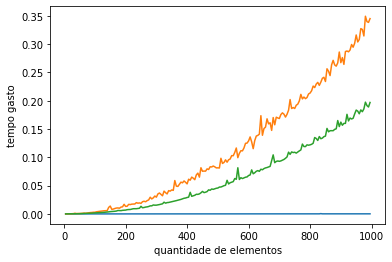

In [39]:
def calcular_bubble_sort():
  tempos_aleatorios, tempos_melhores, tempos_piores = [], [], []
  amostras = criar_lista_de_amostras()
  for amostra in amostras: # caso aleatório
    inicio = time.time()
    bubble_sort(amostra)
    tempos_aleatorios.append(time.time() - inicio)
  
  for amostra in amostras: # melhor caso
    inicio = time.time()
    bubble_sort(fazer_melhor_caso(amostra))
    tempos_melhores.append(time.time() - inicio)
  
  for amostra in amostras: # pior caso
    inicio = time.time()
    bubble_sort(fazer_pior_caso(amostra))
    tempos_piores.append(time.time() - inicio)

  plotar_melhor_aleatorio_pior_caso(tempos_melhores, tempos_aleatorios, tempos_piores)

calcular_bubble_sort()

* ***Selection Sort***

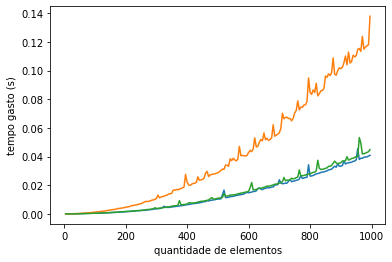

In [43]:
def calcular_selection_sort():
  tempos_aleatorios, tempos_melhores, tempos_piores = [], [], []
  amostras = criar_lista_de_amostras()
  for amostra in amostras: # caso aleatório
    inicio = time.time()
    selection_sort(amostra)
    tempos_aleatorios.append(time.time() - inicio)
  
  for amostra in amostras: # melhor caso
    inicio = time.time()
    selection_sort(fazer_melhor_caso(amostra))
    tempos_melhores.append(time.time() - inicio)
  
  for amostra in amostras: # pior caso
    inicio = time.time()
    selection_sort(fazer_pior_caso(amostra))
    tempos_piores.append(time.time() - inicio)
  
  plotar_melhor_aleatorio_pior_caso(tempos_melhores, tempos_aleatorios, tempos_piores)

calcular_selection_sort()

* ***Insertion Sort***

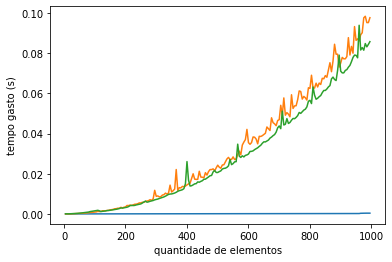

In [42]:
def calcular_insertion_sort():
  tempos_aleatorios, tempos_melhores, tempos_piores = [], [], []
  amostras = criar_lista_de_amostras()
  for amostra in amostras: # caso aleatório
    inicio = time.time()
    insertion_sort(amostra)
    tempos_aleatorios.append(time.time() - inicio)
  
  for amostra in amostras: # melhor caso
    inicio = time.time()
    insertion_sort(fazer_melhor_caso(amostra))
    tempos_melhores.append(time.time() - inicio)
  
  for amostra in amostras: # pior caso
    inicio = time.time()
    insertion_sort(fazer_pior_caso(amostra))
    tempos_piores.append(time.time() - inicio)
  
  plotar_melhor_aleatorio_pior_caso(tempos_melhores, tempos_aleatorios, tempos_piores)

calcular_insertion_sort()

* ***Merge Sort***

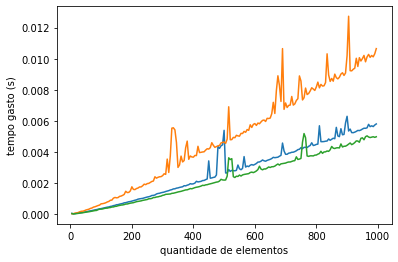

In [41]:
def calcular_merge_sort():
  tempos_aleatorios, tempos_melhores, tempos_piores = [], [], []
  amostras = criar_lista_de_amostras()
  for amostra in amostras: # caso aleatório
    inicio = time.time()
    heap_sort(amostra)
    tempos_aleatorios.append(time.time() - inicio)
  
  for amostra in amostras: # melhor caso
    inicio = time.time()
    heap_sort(fazer_melhor_caso(amostra))
    tempos_melhores.append(time.time() - inicio)
  
  for amostra in amostras: # pior caso
    inicio = time.time()
    heap_sort(fazer_pior_caso(amostra))
    tempos_piores.append(time.time() - inicio)
  
  plotar_melhor_aleatorio_pior_caso(tempos_melhores, tempos_aleatorios, tempos_piores)

calcular_merge_sort()

* ***Heap Sort***

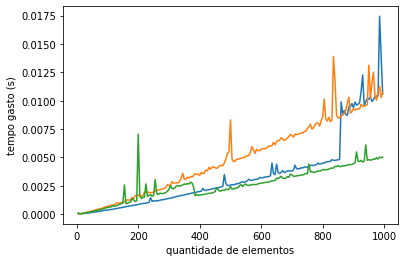

In [44]:
def calcular_heap_sort():
  tempos_aleatorios, tempos_melhores, tempos_piores = [], [], []
  amostras = criar_lista_de_amostras()
  for amostra in amostras: # caso aleatório
    inicio = time.time()
    heap_sort(amostra)
    tempos_aleatorios.append(time.time() - inicio)
  
  for amostra in amostras: # melhor caso
    inicio = time.time()
    heap_sort(fazer_melhor_caso(amostra))
    tempos_melhores.append(time.time() - inicio)
  
  for amostra in amostras: # pior caso
    inicio = time.time()
    heap_sort(fazer_pior_caso(amostra))
    tempos_piores.append(time.time() - inicio)
  
  plotar_melhor_aleatorio_pior_caso(tempos_melhores, tempos_aleatorios, tempos_piores)

calcular_heap_sort()

* ***Quick Sort***

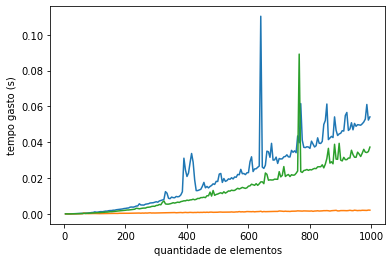

In [45]:
def calcular_quick_sort():
  tempos_aleatorios, tempos_melhores, tempos_piores = [], [], []
  amostras = criar_lista_de_amostras()
  for amostra in amostras: # caso aleatório
    inicio = time.time()
    quick_sort(amostra)
    tempos_aleatorios.append(time.time() - inicio)
  
  for amostra in amostras: # melhor caso
    inicio = time.time()
    quick_sort(fazer_melhor_caso(amostra))
    tempos_melhores.append(time.time() - inicio)
  
  for amostra in amostras: # pior caso
    inicio = time.time()
    quick_sort(fazer_pior_caso(amostra))
    tempos_piores.append(time.time() - inicio)
  
  plotar_melhor_aleatorio_pior_caso(tempos_melhores, tempos_aleatorios, tempos_piores)

calcular_quick_sort()

# *Resolução da questão 2*

In [46]:
import random

def dividir(lista, esquerda, direita):
  pivo = lista[esquerda]
  i = esquerda + 1
  for j in range(esquerda + 1, direita):
    if lista[j] < pivo:
      lista[j], lista[i] = lista[i], lista[j]
      i += 1
  lista[esquerda], lista[i - 1] = lista[i - 1], lista[esquerda]
  return i - 1


def quick_sort_randomico(lista, esquerda, direita):
  if esquerda < direita:
    pivo = random.randint(esquerda, direita - 1)
    lista[pivo], lista[esquerda] = (lista[esquerda], lista[pivo])
    indice_pivo = dividir(lista, esquerda, direita)
    quick_sort_randomico(lista, esquerda, indice_pivo)  # recursive quicksort to the left of the pivot point
    quick_sort_randomico(lista, indice_pivo + 1, direita) 

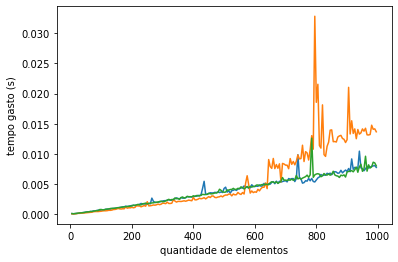

In [47]:
def calcular_quick_sort_randomico():
  tempos_aleatorios, tempos_melhores, tempos_piores = [], [], []
  amostras = criar_lista_de_amostras()
  for amostra in amostras: # caso aleatório
    inicio = time.time()
    quick_sort_randomico(amostra, 0, len(amostra))
    tempos_aleatorios.append(time.time() - inicio)
  
  for amostra in amostras: # melhor caso
    inicio = time.time()
    quick_sort_randomico(fazer_melhor_caso(amostra), 0, len(amostra))
    tempos_melhores.append(time.time() - inicio)
  
  for amostra in amostras: # pior caso
    inicio = time.time()
    quick_sort_randomico(fazer_pior_caso(amostra), 0, len(amostra))
    tempos_piores.append(time.time() - inicio)
  
  plotar_melhor_aleatorio_pior_caso(tempos_melhores, tempos_aleatorios, tempos_piores)

calcular_quick_sort_randomico()